In [2]:
import io
import pandas as pd
from IPython.display import HTML, display
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as pl
from sklearn import datasets
from ydata_profiling import ProfileReport
import plotly.express as px

In [ ]:
#import for ML model
# ==== A) Train/evaluate models, then compute & SAVE SHAP results ====
import warnings, joblib, shap, numpy as np, pandas as pd
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC


In [3]:
wine = datasets.load_wine(as_frame=True)
df_wine = wine.frame  # already a pandas DataFrame
df_wine.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0

In [4]:
def summarize_df(df):
    display(df.shape)
    display(df.dtypes)
    display(df.info())
    display(df)
summarize_df(df_wine)

(178, 14)

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                            int64
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

None

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  target  
0                            3.92   1065.0       0  
1                            3.40   1050.0       0  
2                            3.17   1185.0       0  
3                            3.45   1480.0       0  
4                            2.93    735.0       0  
..                            ...      ...     ...  
173                          1.74    740.0       2  
174                          1.56    750.0       2  
175                          1.56    835.0       2  
176                          1.62    840.0       2  
177                          1.60    560.0       2  

[178 rows x 14 columns]

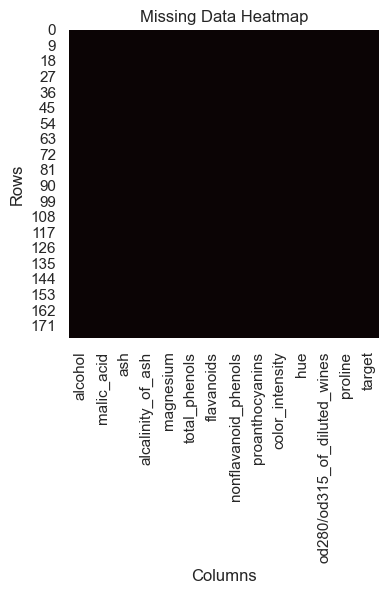

In [5]:
sns.set_theme(style="whitegrid")
sns.set_palette("pastel")
fig, ax = plt.subplots(figsize=(4, 4))  # Create figure & axes
sns.heatmap(df_wine.isnull(), cbar=False, cmap="mako", ax=ax)  # Tell seaborn which axes to draw on
ax.set_title("Missing Data Heatmap")  # Matplotlib style
ax.set_xlabel("Columns")
ax.set_ylabel("Rows")
plt.show()

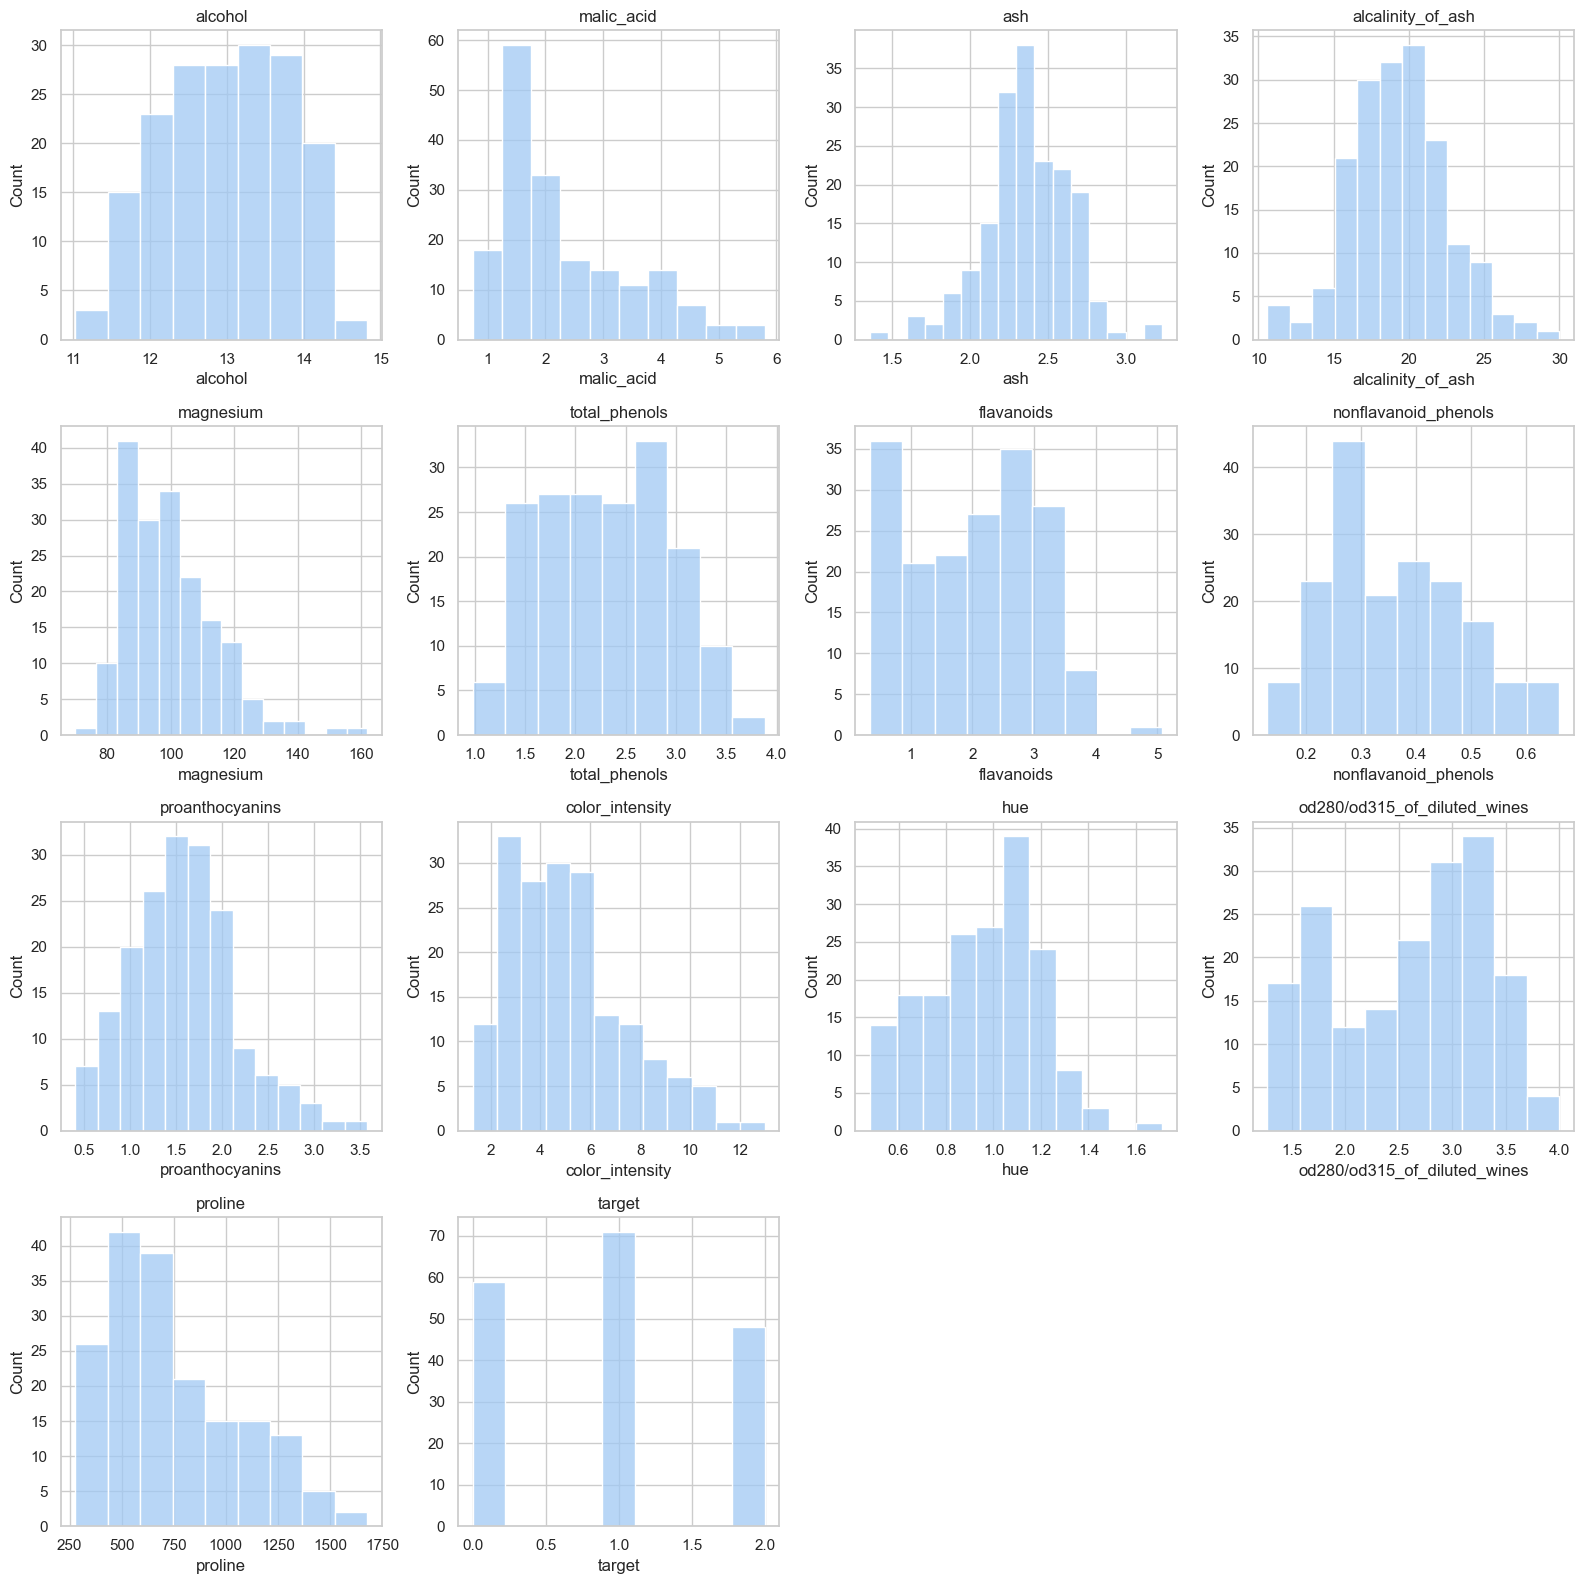

In [6]:
num_cols = df_wine.select_dtypes(include="number").columns
plt.figure(figsize=(16, 4 * ((len(num_cols) - 1) // 4 + 1)))
for i, col in enumerate(num_cols, 1):
    plt.subplot((len(num_cols) - 1) // 4 + 1, 4, i)
    sns.histplot(df_wine[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [7]:
df_wine['target'].unique() #multi class classification, wine 0,1,2 

array([0, 1, 2])

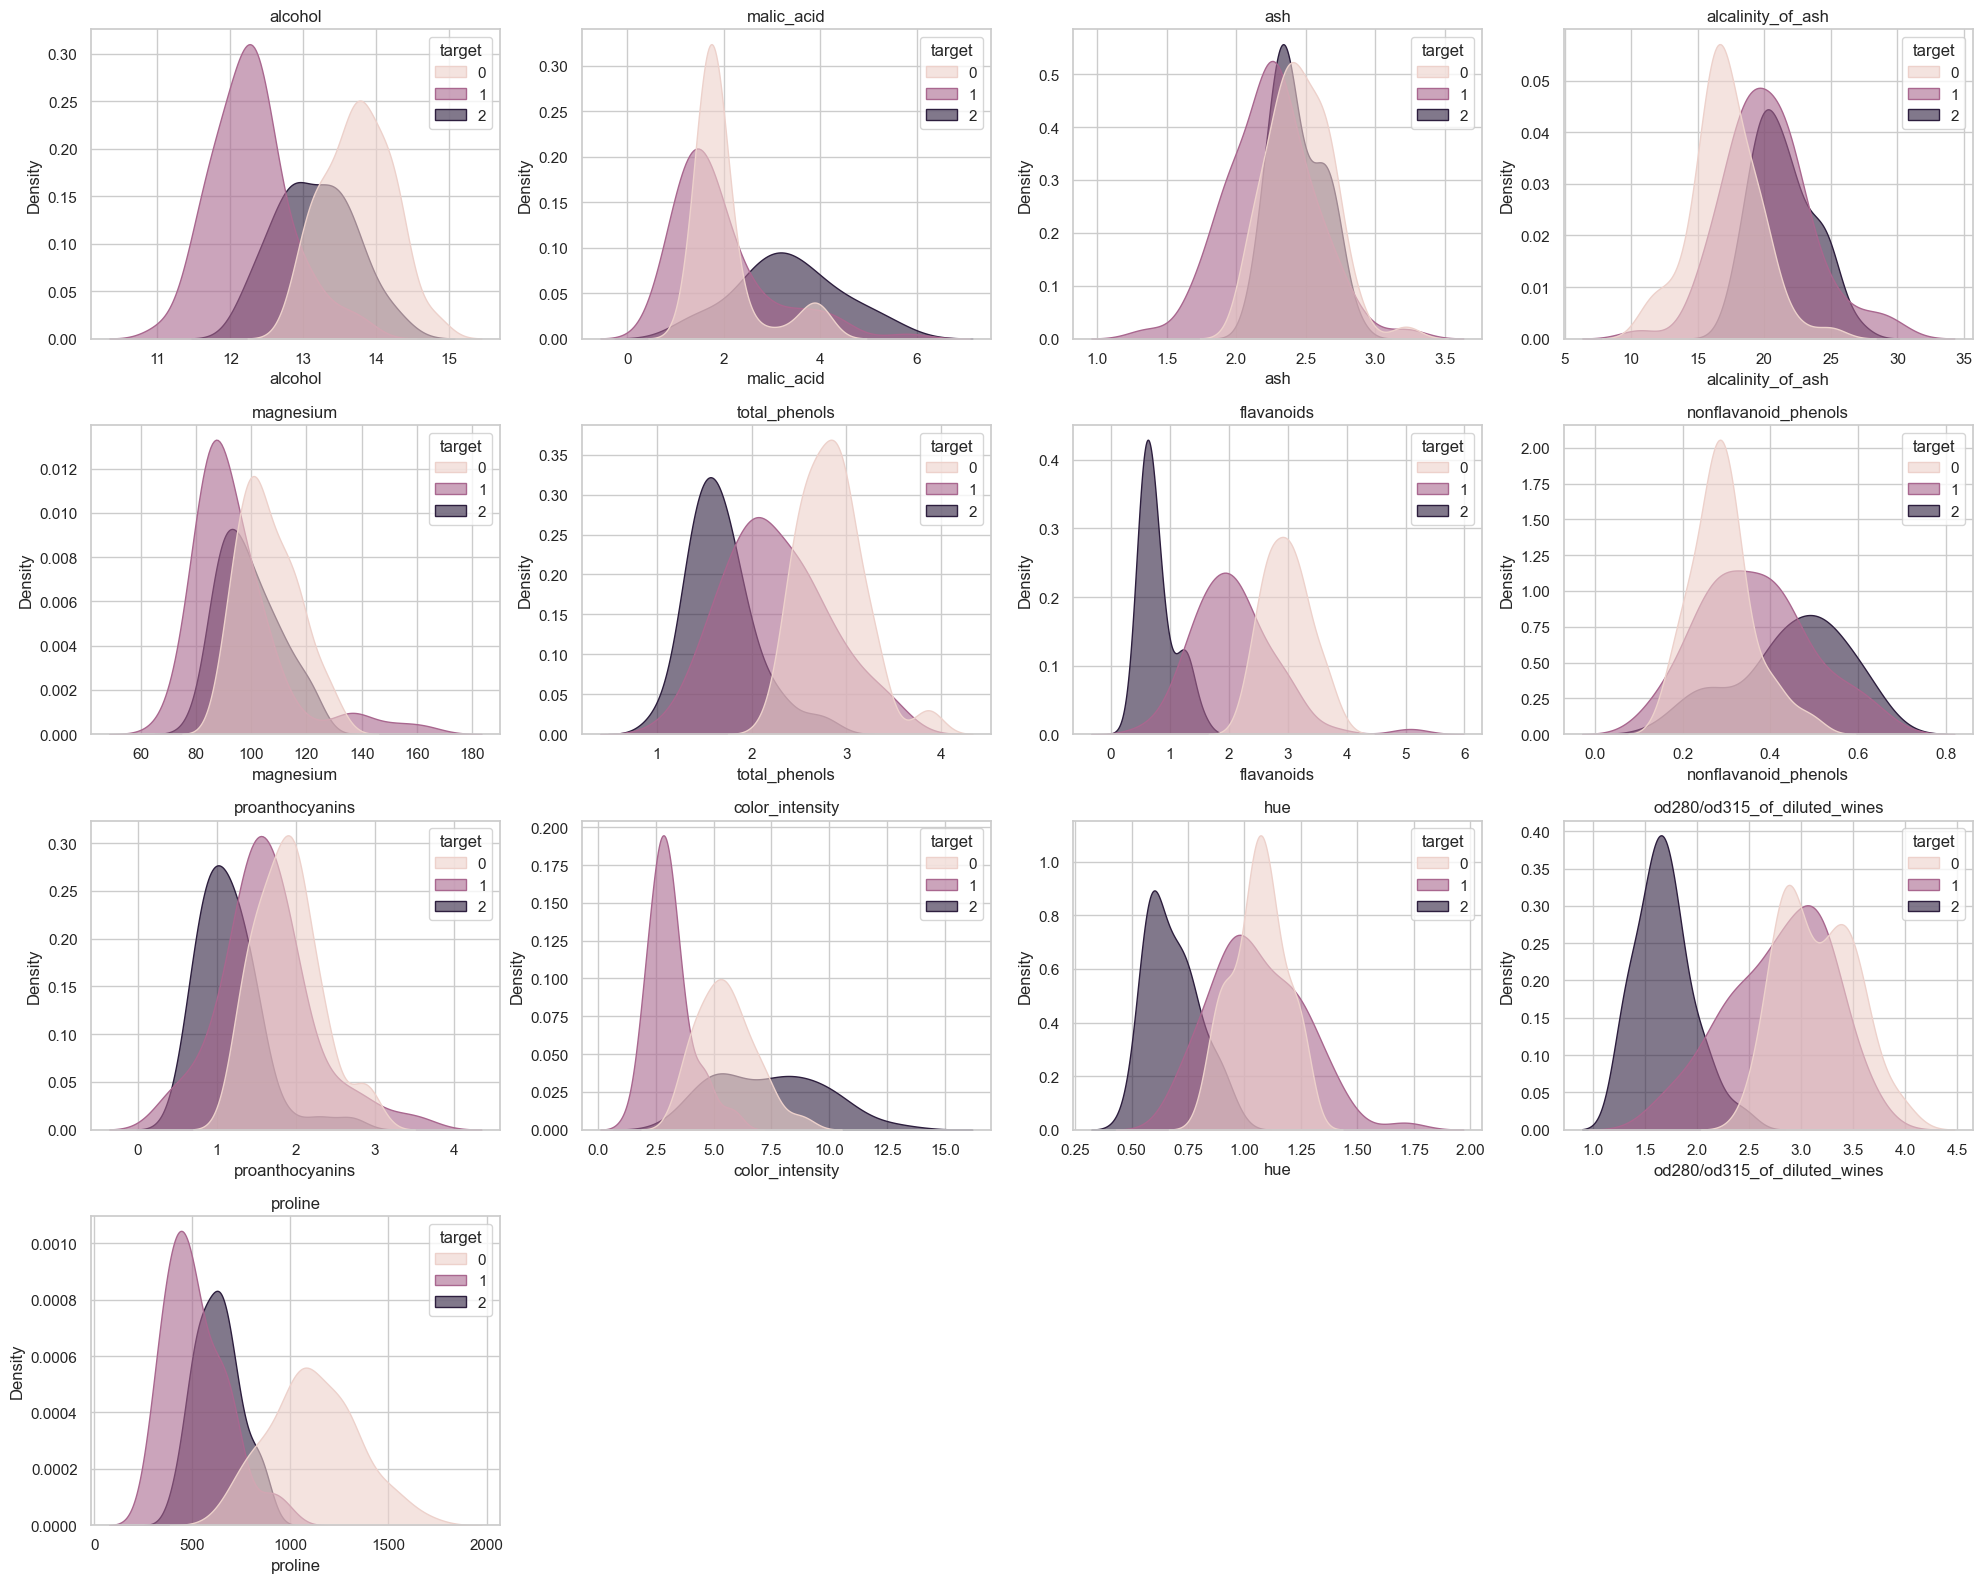

In [8]:
sns.set_theme(style="whitegrid")
sns.set_palette("pastel")

num_cols = df_wine.select_dtypes(include="number").columns.drop("target")
n_rows = (len(num_cols) - 1) // 4 + 1

plt.figure(figsize=(20, 4 * n_rows))
for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, 4, i)
    sns.kdeplot(data=df_wine, x=col, hue="target", fill=True, alpha=0.6)
    plt.title(col)

plt.tight_layout()
plt.show()

#ash doesn't show distinction by target at all, alcalinity of ash strangely too - lets do an anova test, for feature imp

In [17]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import statsmodels.api as sm
import pandas as pd
from IPython.display import HTML

# --- config ---
y_vars = ["ash", "magnesium"]  # the two features you want to check i suspect won't add to the model, i don't see any correlation any relation versus the target
# ----------------

# all numeric predictors except target
numeric_cols = df_wine.select_dtypes(include="number").drop(columns=["target"]).columns.tolist()

# (optional) keep all Xs including ash/magnesium; if you want strictly "everything else",
# uncomment the next line:
# x_vars = [c for c in numeric_cols if c not in y_vars]
x_vars = numeric_cols

classes = sorted(df_wine["target"].unique())
n_rows, n_cols = len(y_vars), len(x_vars)

# colors per class
colors = px.colors.qualitative.Set1

fig = make_subplots(rows=n_rows, cols=n_cols, shared_xaxes=False, shared_yaxes=False)

for i, y_col in enumerate(y_vars, start=1):
    for j, x_col in enumerate(x_vars, start=1):
        if x_col != y_col:
            # scatter + per-class OLS line
            for c_idx, c_val in enumerate(classes):
                class_df = df_wine[df_wine["target"] == c_val]

                # points
                fig.add_trace(
                    go.Scatter(
                        x=class_df[x_col],
                        y=class_df[y_col],
                        mode='markers',
                        marker=dict(size=3, opacity=0.5, color=colors[c_idx]),
                        name=f"Class {c_val}" if (i == 1 and j == 1 and c_idx == 0) else None,
                        showlegend=(i == 1 and j == 1 and c_idx == 0)
                    ),
                    row=i, col=j
                )

                # regression line
                if len(class_df) > 1:
                    X = sm.add_constant(class_df[x_col])
                    model = sm.OLS(class_df[y_col], X).fit()
                    x_range = pd.Series(sorted(class_df[x_col]))
                    y_pred = model.predict(sm.add_constant(x_range))
                    fig.add_trace(
                        go.Scatter(
                            x=x_range,
                            y=y_pred,
                            mode='lines',
                            line=dict(color=colors[c_idx], width=1),
                            showlegend=False
                        ),
                        row=i, col=j
                    )
        else:
            # diagonal: per-class histogram
            for c_idx, c_val in enumerate(classes):
                class_df = df_wine[df_wine["target"] == c_val]
                fig.add_trace(
                    go.Histogram(
                        x=class_df[x_col],
                        marker=dict(color=colors[c_idx]),
                        opacity=0.5,
                        showlegend=False
                    ),
                    row=i, col=j
                )

# Axis labels: top row shows X variable names, first column shows Y variable names
for j, col_name in enumerate(x_vars, start=1):
    fig.update_xaxes(title_text=col_name, row=n_rows, col=j)
for i, row_name in enumerate(y_vars, start=1):
    fig.update_yaxes(title_text=row_name, row=i, col=1)

# size: big canvas so cells are readable
cell_px = 260  # tweak if you want bigger/smaller cells
fig.update_layout(
    width=n_cols * cell_px,
    height=n_rows * cell_px,
    margin=dict(l=60, r=60, t=40, b=40),
    dragmode="pan",
    legend_title_text="Wine Class",
    bargap=0.05
)

# scrollable container in-notebook
viewport_css = "width:1200px; height:700px; overflow:auto; border:1px solid #ddd;"
HTML(f"""
<div style="{viewport_css}">
  {fig.to_html(full_html=False, include_plotlyjs='cdn')}
</div>
""")



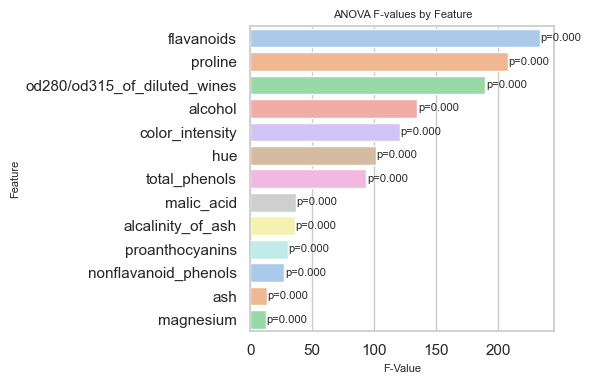

In [26]:
from sklearn.feature_selection import f_classif
#anova for f test
X = df_wine.drop(columns="target")
y = df_wine["target"]

#anova
f_values, p_values = f_classif(X, y)

# Results
anova_df = pd.DataFrame({
    "Feature": X.columns,
    "F_value": f_values,
    "p_value": p_values
}).sort_values(by="F_value", ascending=False)

anova_df["p_value"] = anova_df["p_value"].apply(lambda x: f"{x:.3f}")
# Sort by F_value
anova_df = anova_df.sort_values(by="F_value", ascending=False)  # Ascending for horizontal bars
# --- Plot ---
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=anova_df,x="F_value",y="Feature",hue="Feature",dodge=False,legend=False,palette="pastel")

# Add p-value labels on bars
for i, (f_val, p_val) in enumerate(zip(anova_df["F_value"], anova_df["p_value"])):
    ax.text(f_val + 0.5, i, f"p={p_val}", va="center", fontsize=8)
plt.title("ANOVA F-values by Feature", fontsize=8)
plt.xlabel("F-Value",fontsize=8)
plt.ylabel("Feature",fontsize=8)
plt.tight_layout()
plt.show()

### seeing as the feature ash/magnesium even in the density plot seems like you can't use them to distinguish between classes
### while we don't have a lot of features, i'd still like to do a pca dimensionality reduction to see if they are needed

Random Forest feature importance (% of total):
flavanoids                      16.684229
proline                         16.367965
color_intensity                 16.046680
alcohol                         13.119390
od280/od315_of_diluted_wines    11.141122
hue                              8.465322
total_phenols                    4.908793
alcalinity_of_ash                3.072985
malic_acid                       3.027706
magnesium                        2.655496
proanthocyanins                  2.216490
ash                              1.339350
nonflavanoid_phenols             0.954473
dtype: float64


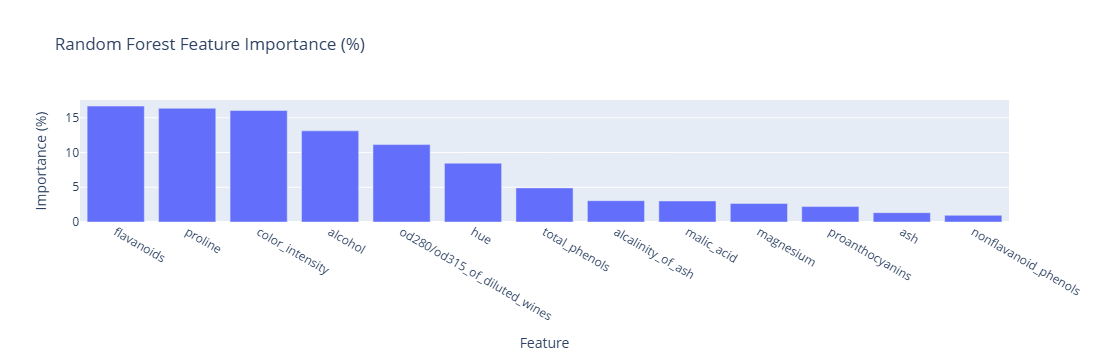

In [32]:
from sklearn.ensemble import RandomForestClassifier
# Separate features and target
X = df_wine.drop(columns=['target'])
y = df_wine['target']

# Fit Random Forest
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X, y)

# Convert to % of total importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances_percent = (importances / importances.sum()) * 100

# Sort descending
importances_percent = importances_percent.sort_values(ascending=False)

print("Random Forest feature importance (% of total):")
print(importances_percent)

# Optional: plot
import plotly.express as px
fig = px.bar(
    importances_percent.reset_index(),
    x='index', y=0,
    labels={'index':'Feature', '0':'Importance (%)'},
    title='Random Forest Feature Importance (%)'
)
fig.show()

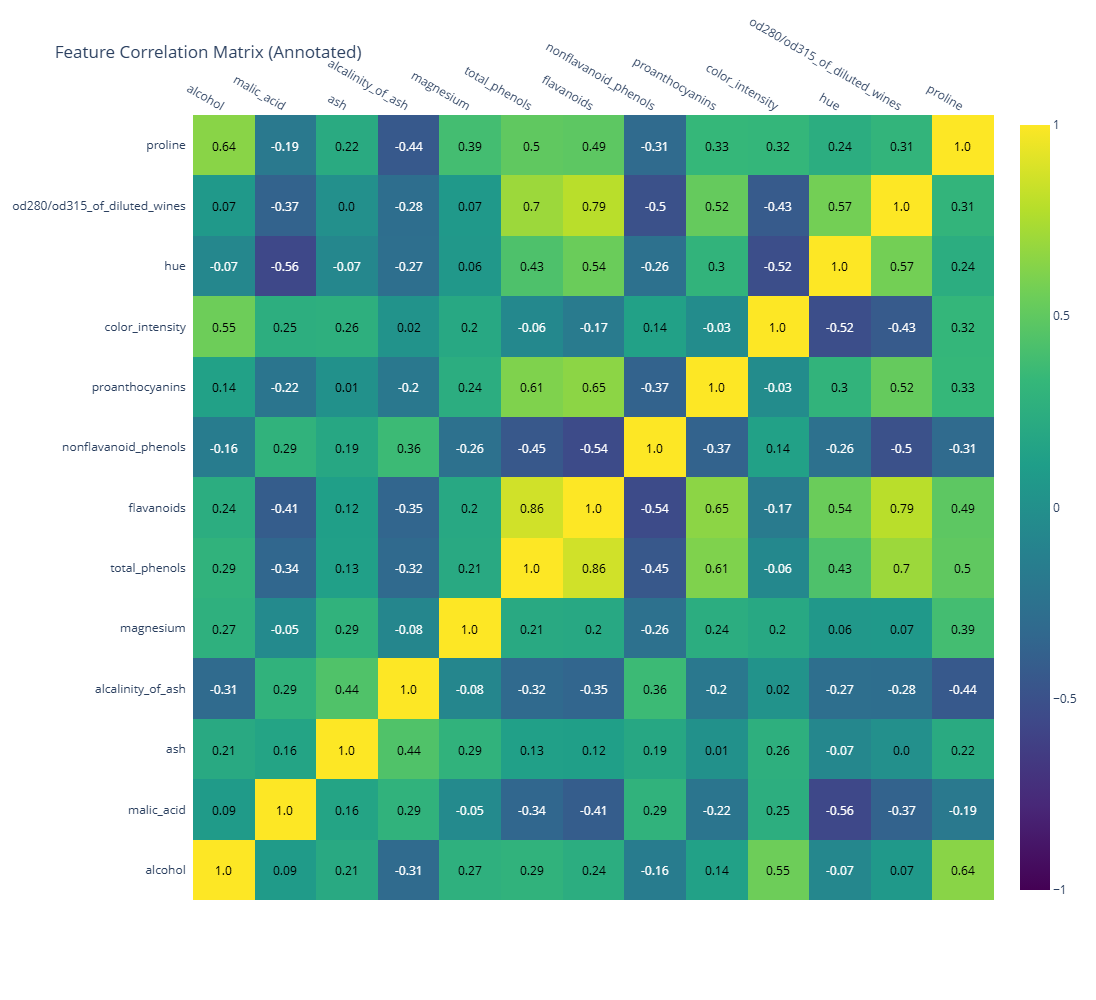

In [37]:
import plotly.figure_factory as ff
numeric_df = df_wine.select_dtypes(include='number').drop(columns=['target'])
corr = numeric_df.corr().round(2)  # round for cleaner annotations

# Create annotated heatmap
fig = ff.create_annotated_heatmap(
    z=corr.values,
    x=list(corr.columns),
    y=list(corr.columns),
    annotation_text=corr.values.astype(str),
    colorscale='viridis',
    zmin=-1, zmax=1,
    showscale=True
)

fig.update_layout(
    title="Feature Correlation Matrix (Annotated)",
    width=1000,
    height=1000,
    margin=dict(l=100, r=100, t=100, b=100)
)

# Move x-axis labels to the top
fig.update_xaxes(side="top")

fig.show() #perfect dataset no strong correlation with absolute value more than 0.6, still non flavanoids seems to have issue with correlation with best feature so removed

In [ ]:
#Create ML target and X variables
X = df_wine.drop(columns=['target'])
y = df_wine['target']
feature_names = X.columns.tolist()
class_names = np.sort(y.unique()).tolist()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

In [44]:
# ML Model
models = {
    "Decision Tree (CART)": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42),
    # TreeExplainer for GradientBoosting multi-class is limited -> we’ll use PermutationExplainer
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Gaussian Naive Bayes": GaussianNB(),
    "k-Nearest Neighbors": make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5)),
    "Neural Net (MLP)": make_pipeline(StandardScaler(),
                                      MLPClassifier(hidden_layer_sizes=(64,),
                                                    max_iter=2000, random_state=42)),
    "SVM (RBF)": make_pipeline(StandardScaler(),
                               SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)),
    "SVM (Linear)": make_pipeline(StandardScaler(),
                                  SVC(kernel='linear', probability=True, random_state=42)),
}

# Evaluation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rows, fitted = [], {}

for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rows.append({
        "Model": name,
        "CV Acc (mean)": cv_scores.mean(),
        "CV Acc (std)": cv_scores.std(),
        "Test Acc": accuracy_score(y_test, y_pred),
        "Test F1 (macro)": f1_score(y_test, y_pred, average="macro")
    })
    fitted[name] = model

results = pd.DataFrame(rows).sort_values("Test Acc", ascending=False).reset_index(drop=True)
display(results)

# SHAP for every model
bg_size = min(100, len(X_train))
X_bg = X_train.sample(bg_size, random_state=42)
explain_size = min(200, len(X_test))
X_explain = X_test.sample(explain_size, random_state=42)

from shap.explainers import Tree, Permutation

def compute_shap(name, model):
    """Return dict with explainer + shap values for a fitted model."""
    # Use fast TreeExplainer (raw output) ONLY for DecisionTree/RandomForest.
    if isinstance(model, (DecisionTreeClassifier, RandomForestClassifier)):
        explainer = Tree(model, model_output="raw")  # multi-class friendly
        shap_vals = explainer.shap_values(X_explain)  # list of arrays [n_classes]
        return {"explainer_type": "TreeExplainer(raw)", "explainer": explainer, "shap_values": shap_vals}

    # GradientBoostingClassifier multi-class -> fall back to permutation
    # Pipelines / SVM / kNN / MLP / GNB -> permutation on predict_proba
    explainer = Permutation(model.predict_proba, X_bg, feature_names=feature_names)
    shap_exp = explainer(X_explain)  # SHAP Explanation object
    return {"explainer_type": "PermutationExplainer", "explainer": explainer, "shap_values": shap_exp}

shap_results = {}
for name, model in fitted.items():
    try:
        pack = compute_shap(name, model)
        shap_results[name] = {
            **pack,
            "X_explain": X_explain.copy(),
            "feature_names": feature_names,
            "class_names": class_names,
        }
        print(f"[OK] SHAP computed for: {name} ({pack['explainer_type']})")
    except Exception as e:
        print(f"[WARN] SHAP failed for {name}: {e}")

joblib.dump(shap_results, "shap_results.pkl")
print("Saved SHAP results -> shap_results.pkl")

Model  CV Acc (mean)  CV Acc (std)  Test Acc  \
0         Random Forest       0.976000      0.032000  1.000000   
1  Gaussian Naive Bayes       0.960000      0.050596  1.000000   
2             SVM (RBF)       0.992000      0.016000  0.981481   
3      Neural Net (MLP)       0.976000      0.032000  0.981481   
4     Gradient Boosting       0.895000      0.041231  0.962963   
5  Decision Tree (CART)       0.878333      0.058973  0.962963   
6          SVM (Linear)       0.984000      0.019596  0.962963   
7   k-Nearest Neighbors       0.968000      0.029933  0.944444   

   Test F1 (macro)  
0         1.000000  
1         1.000000  
2         0.980754  
3         0.980754  
4         0.965241  
5         0.963830  
6         0.963624  
7         0.944056

[OK] SHAP computed for: Decision Tree (CART) (TreeExplainer(raw))
[OK] SHAP computed for: Random Forest (TreeExplainer(raw))
[OK] SHAP computed for: Gradient Boosting (PermutationExplainer)
[OK] SHAP computed for: Gaussian Naive Bayes (PermutationExplainer)


PermutationExplainer explainer: 55it [00:11,  2.20s/it]                                                                


[OK] SHAP computed for: k-Nearest Neighbors (PermutationExplainer)
[OK] SHAP computed for: Neural Net (MLP) (PermutationExplainer)


PermutationExplainer explainer: 55it [00:17,  1.26it/s]                                                                


[OK] SHAP computed for: SVM (RBF) (PermutationExplainer)
[OK] SHAP computed for: SVM (Linear) (PermutationExplainer)
Saved SHAP results -> shap_results.pkl


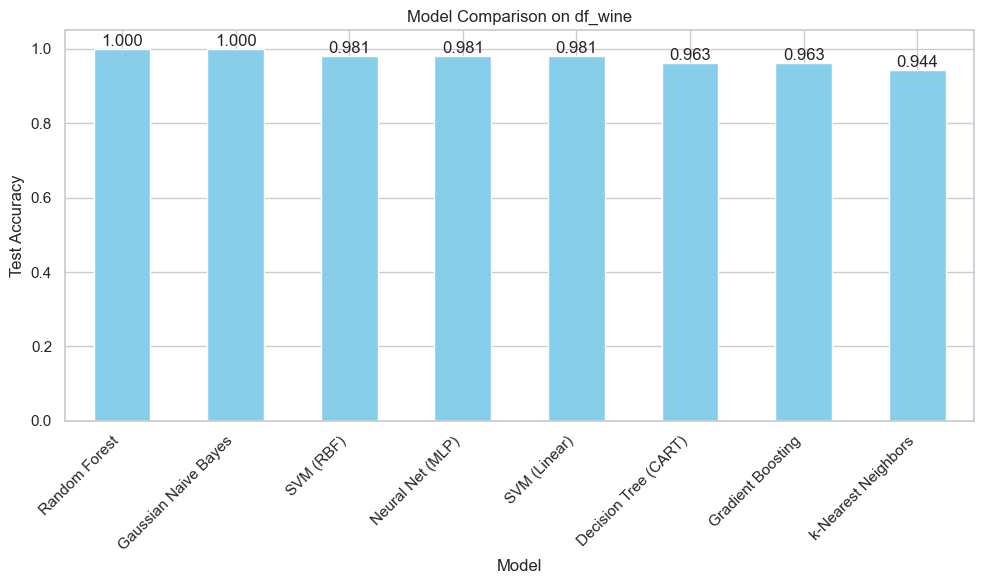

In [41]:
ax = results.plot(x="Model",y="Test Acc",kind="bar",legend=False,figsize=(10, 6),ylim=(0, 1.05),color="skyblue")
plt.ylabel("Test Accuracy")
plt.title("Model Comparison on df_wine")
plt.xticks(rotation=45, ha='right')

# Annotate bars with values
for p in ax.patches:
    ax.annotate(f"{p.get_height():.3f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


=== Decision Tree (CART) ===


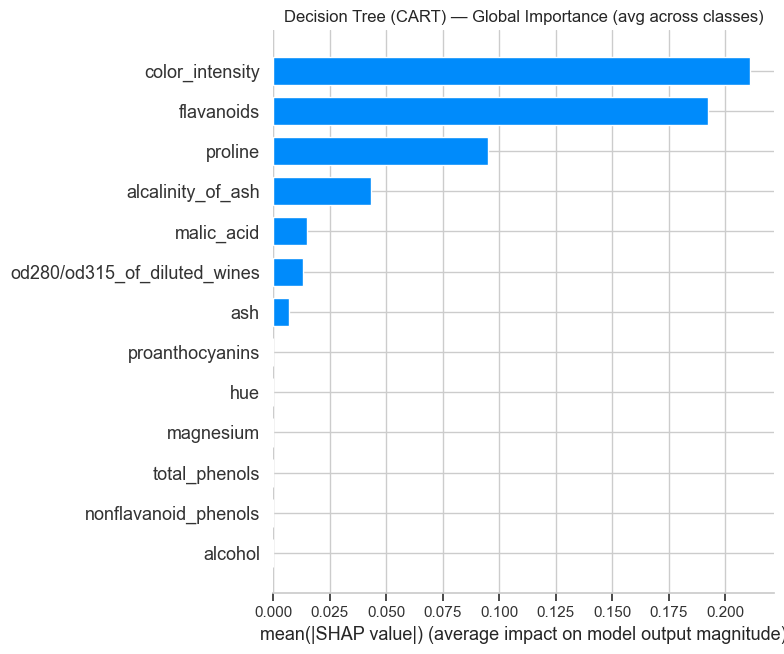

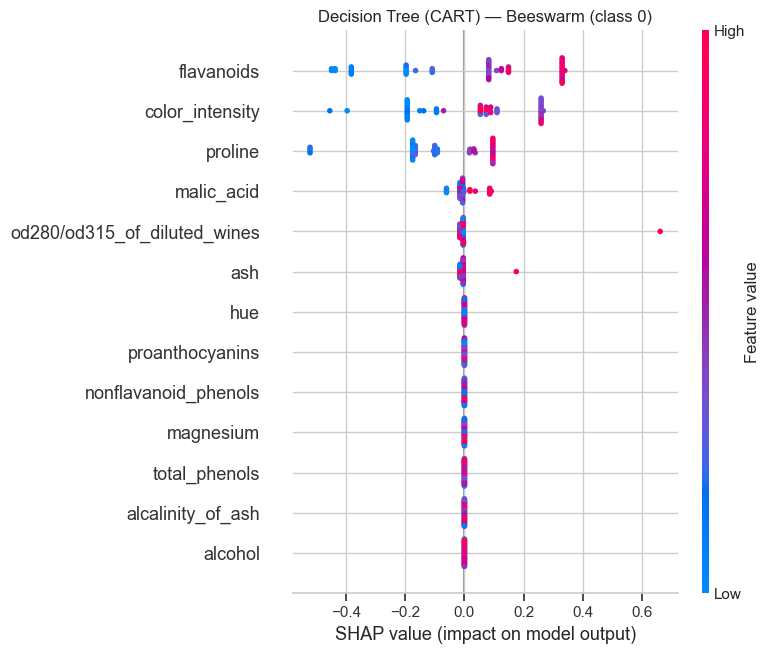

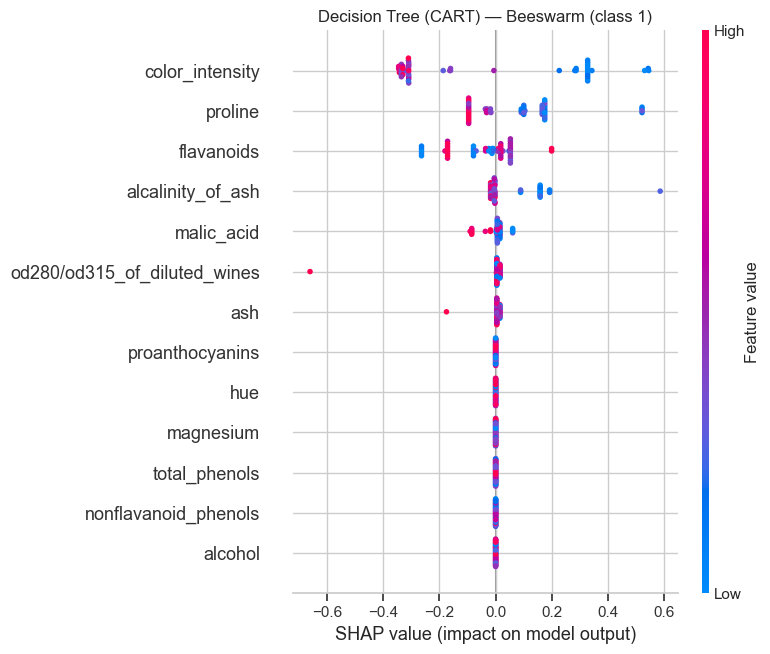

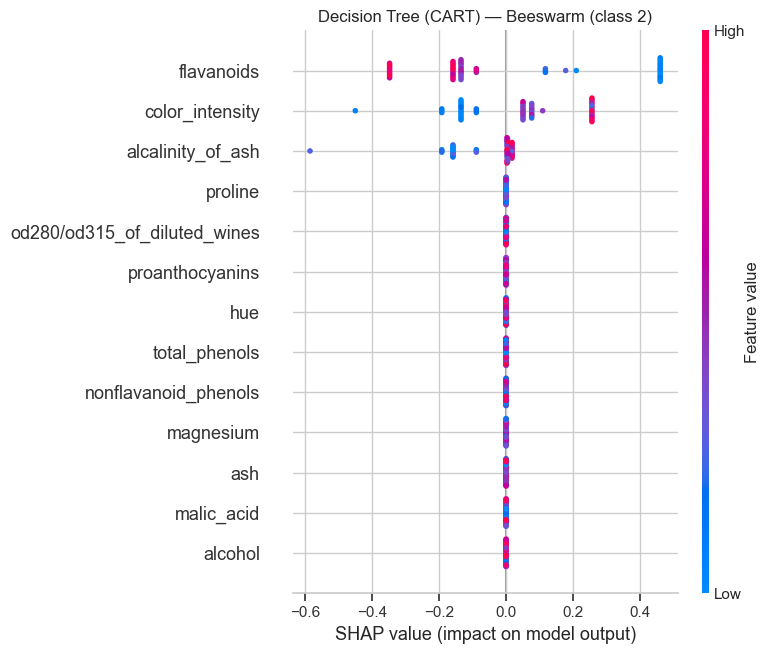


=== Random Forest ===


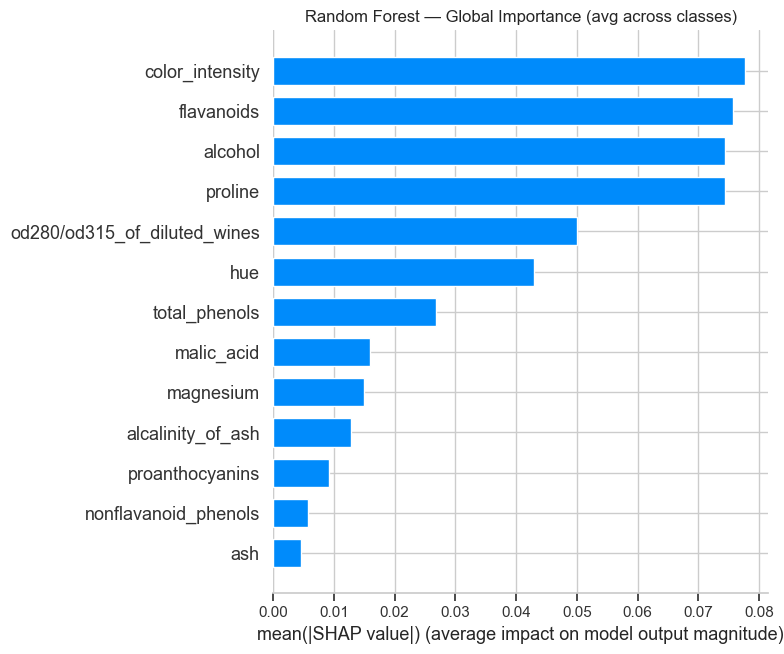

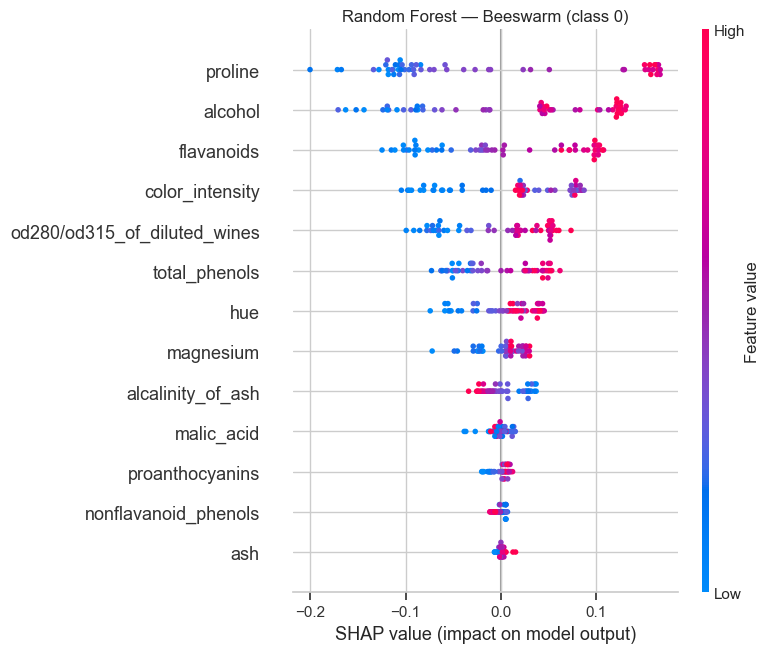

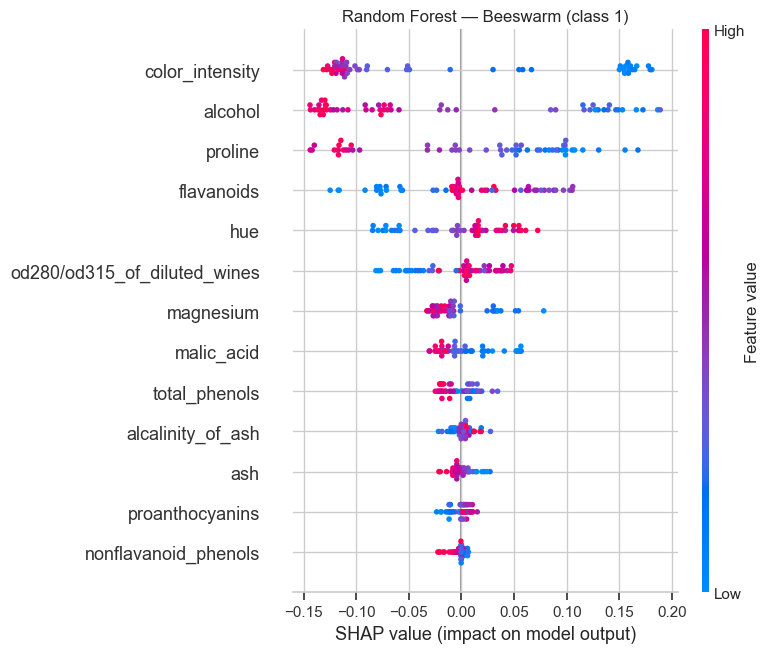

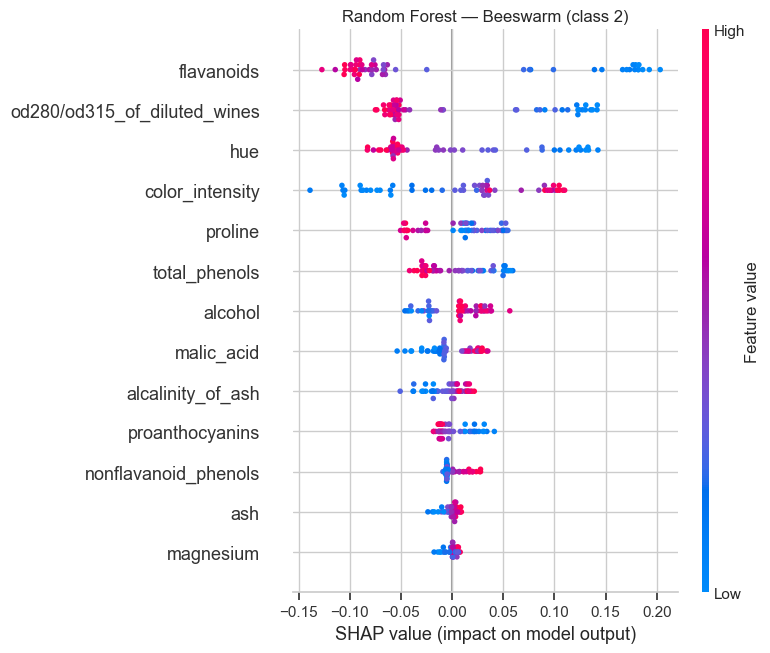


=== Gradient Boosting ===


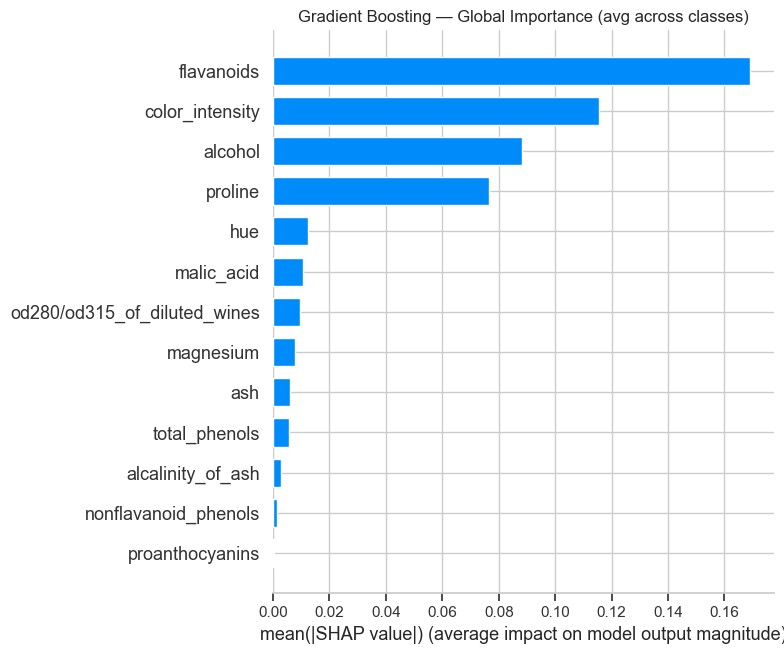

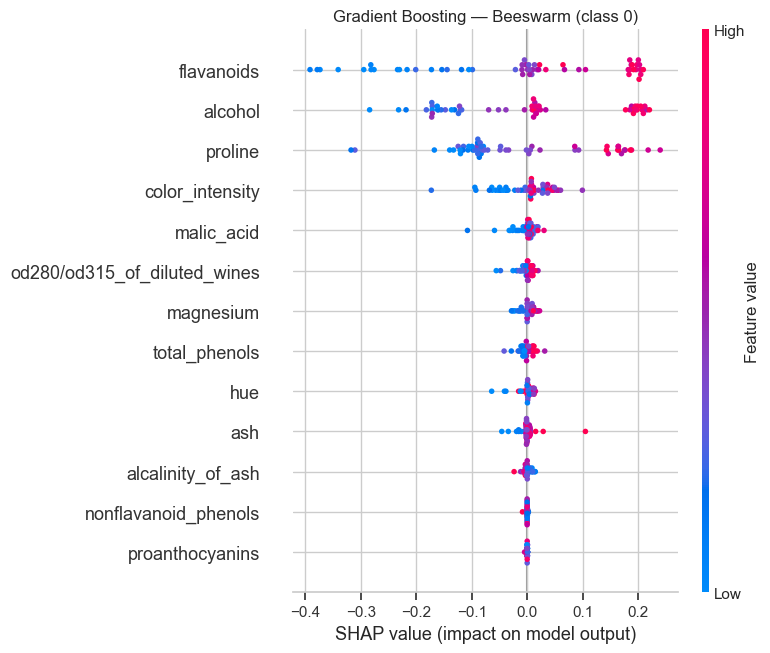

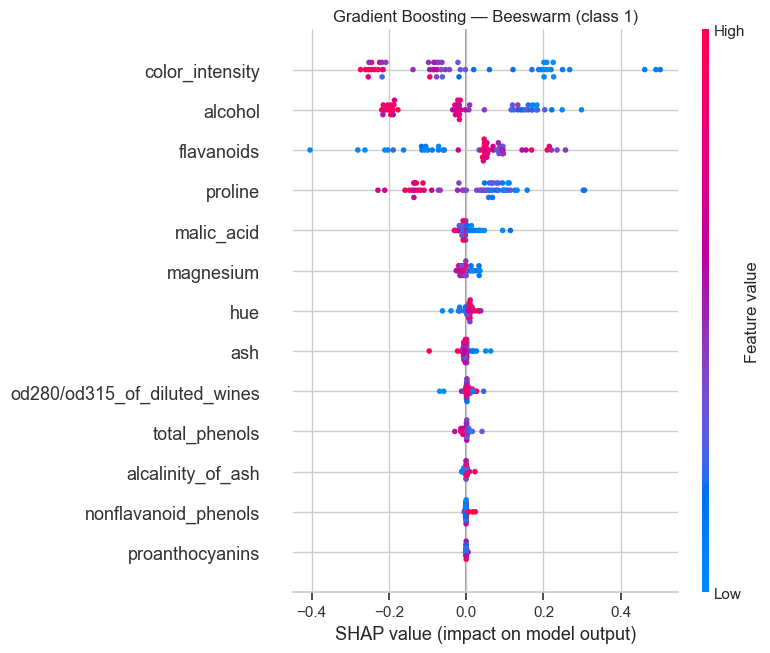

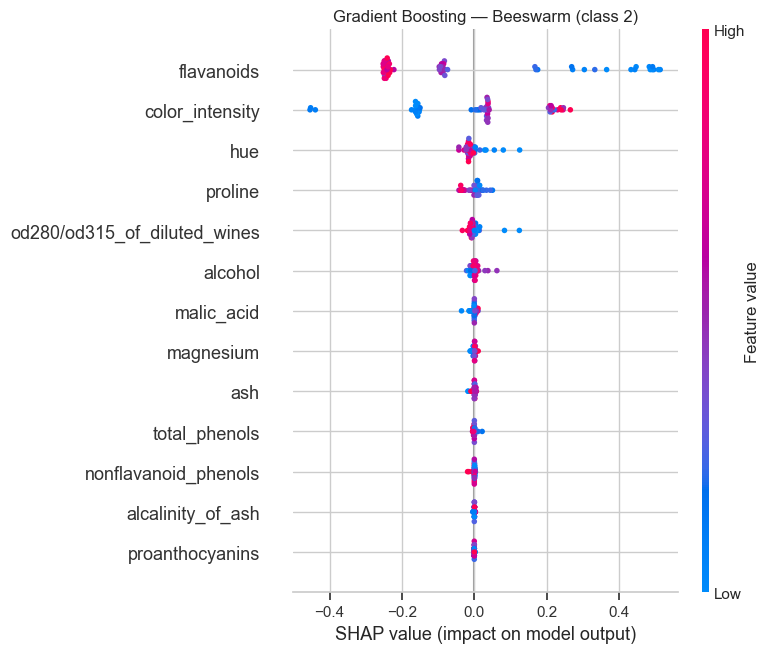


=== Gaussian Naive Bayes ===


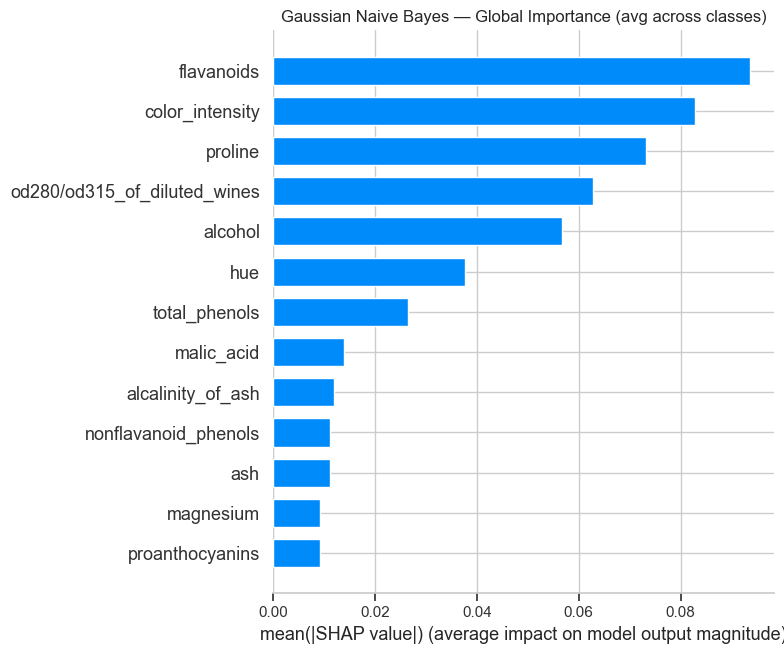

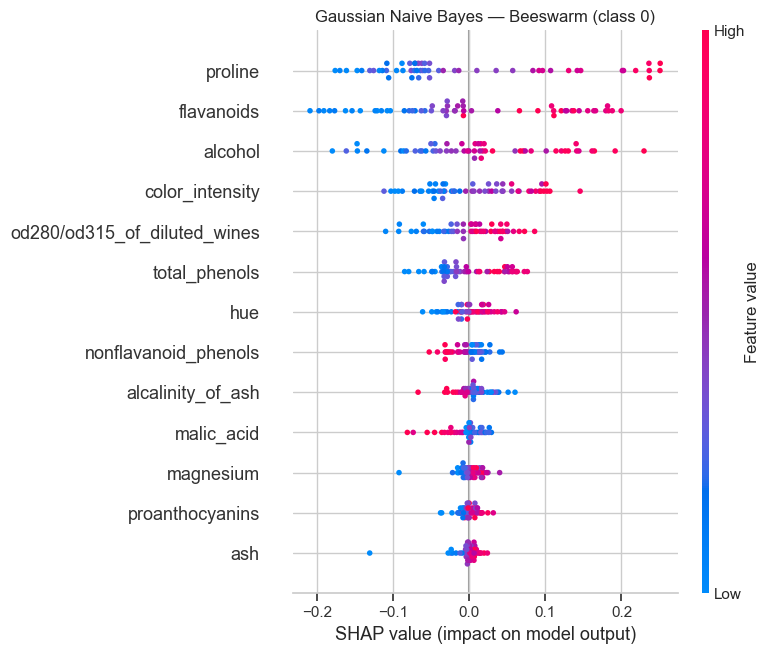

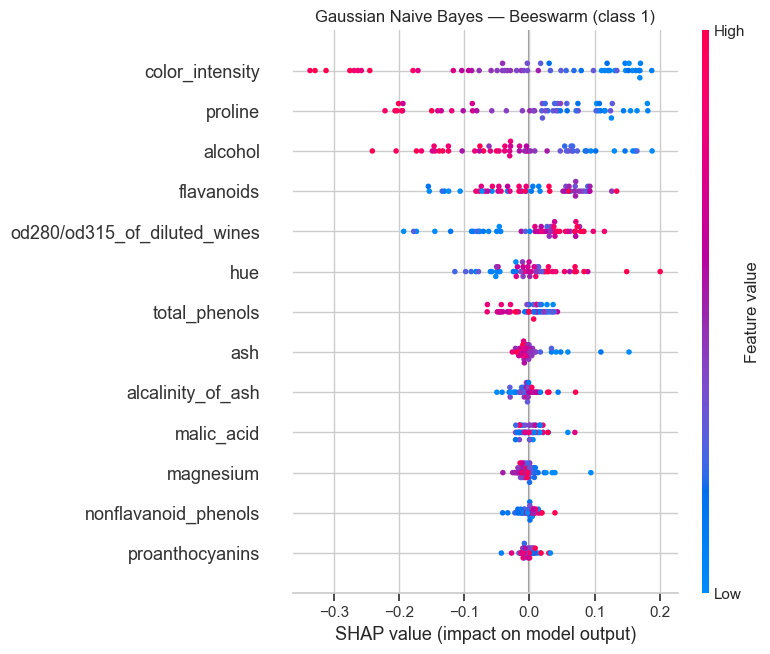

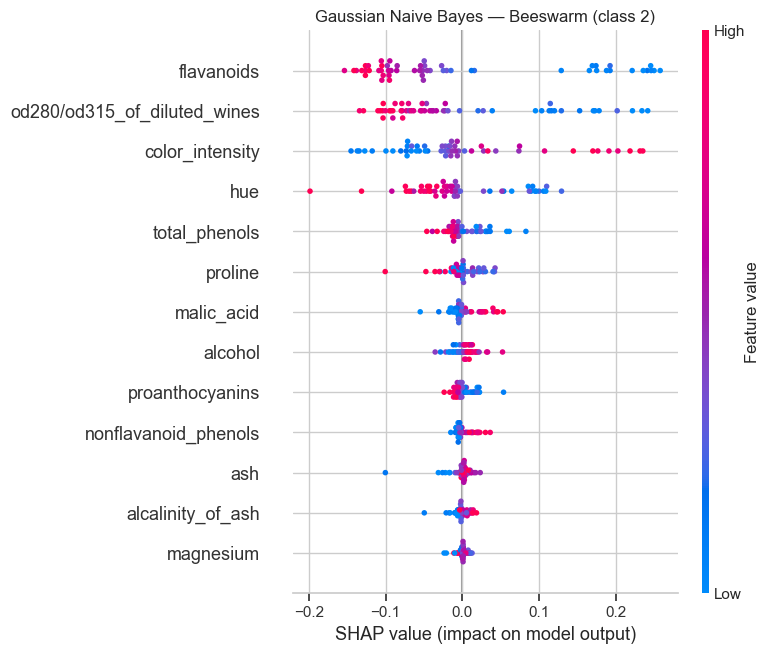


=== k-Nearest Neighbors ===


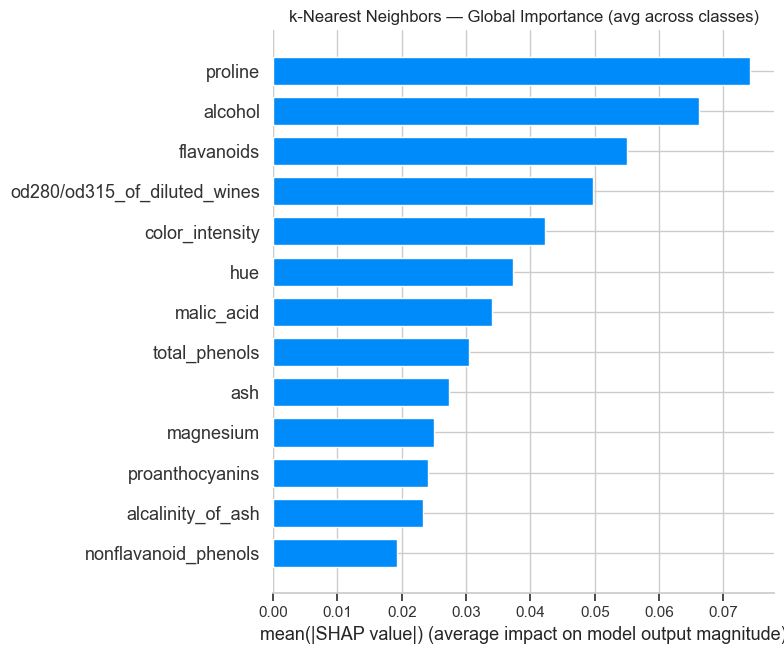

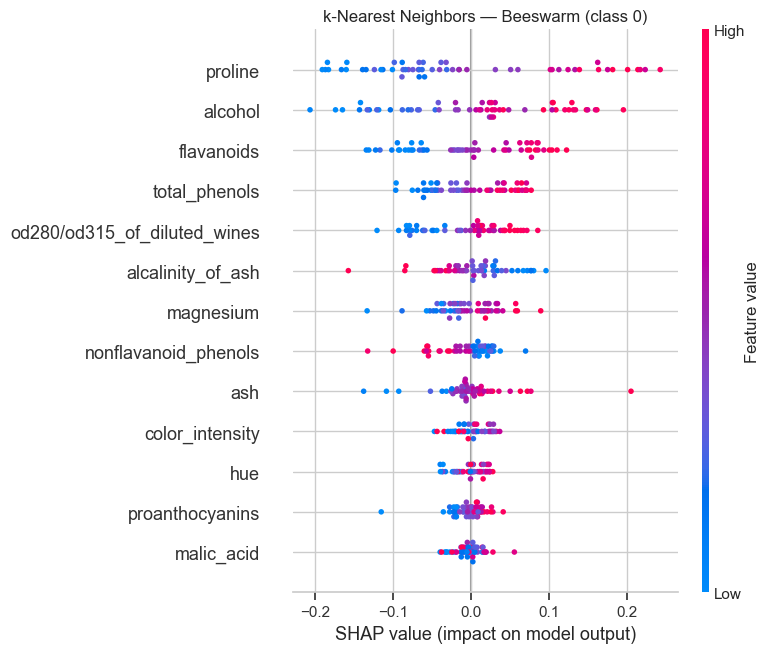

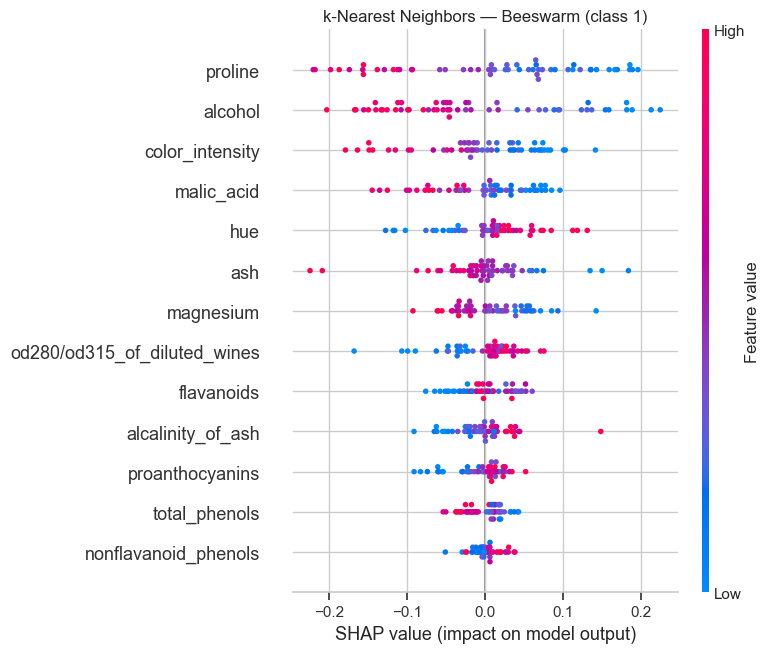

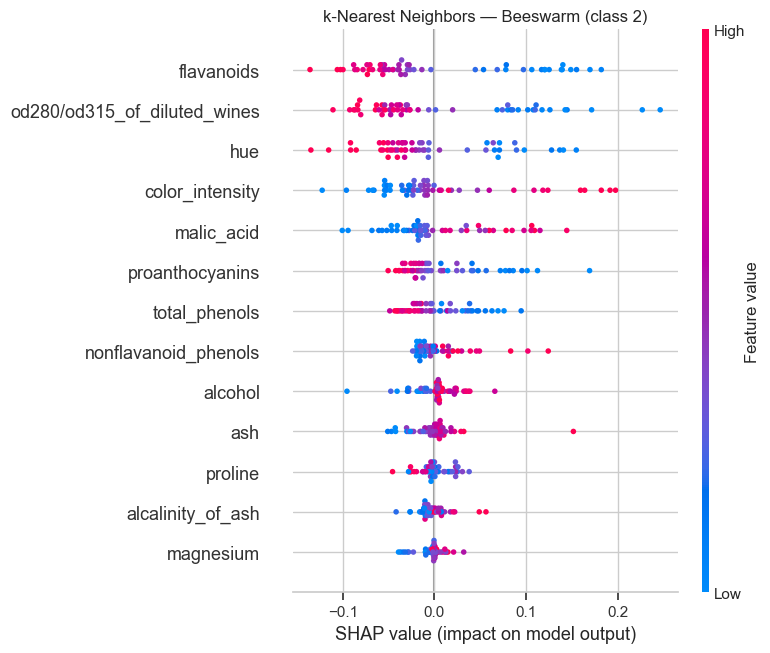


=== Neural Net (MLP) ===


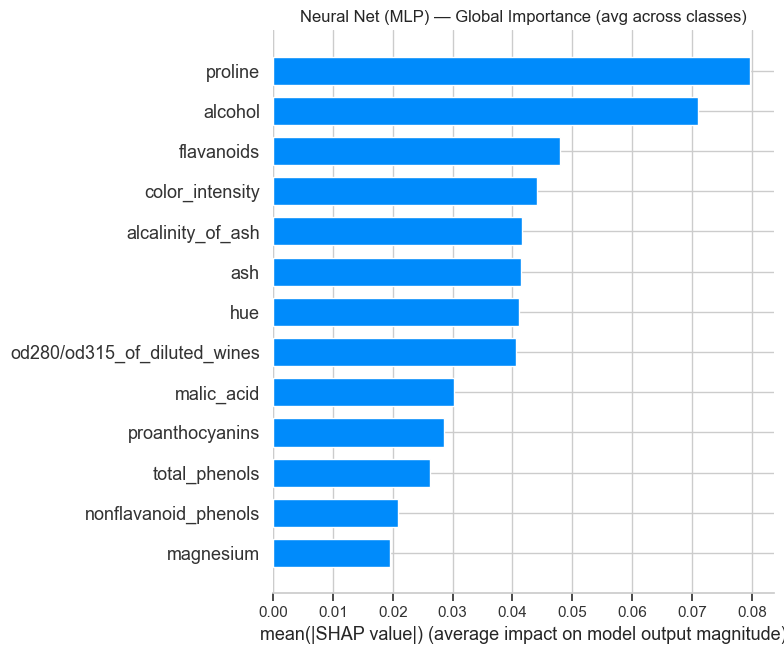

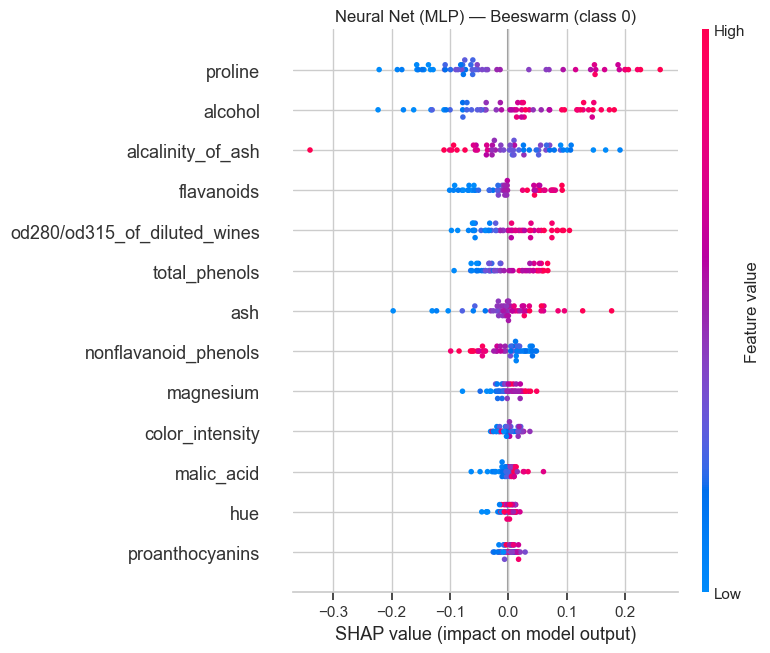

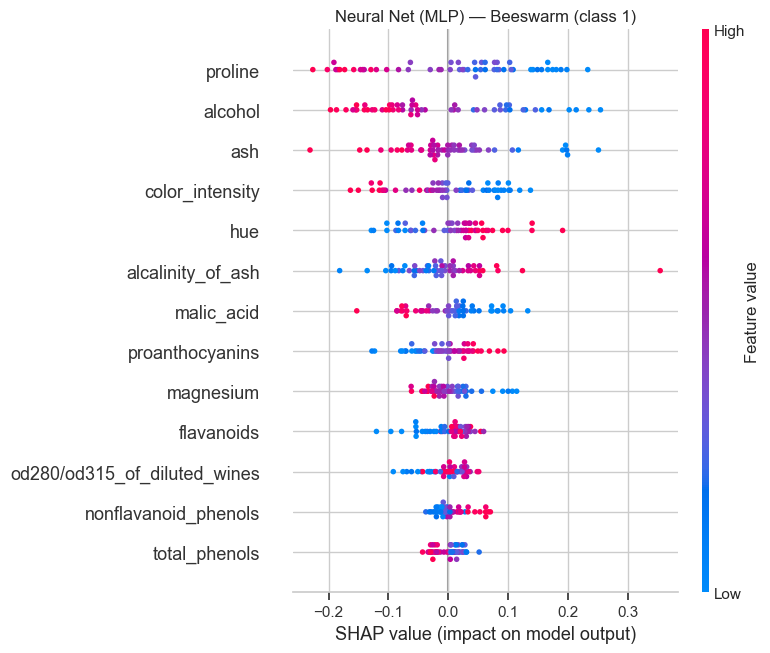

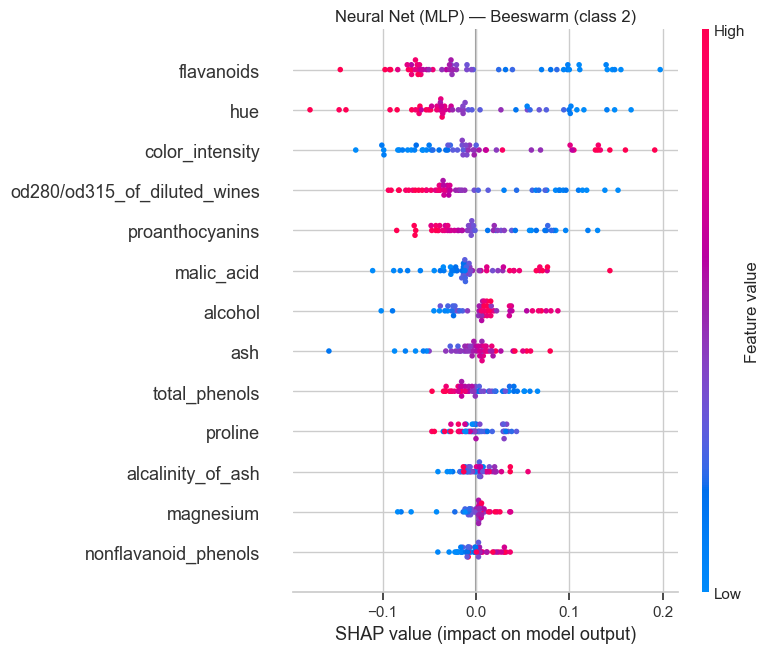


=== SVM (RBF) ===


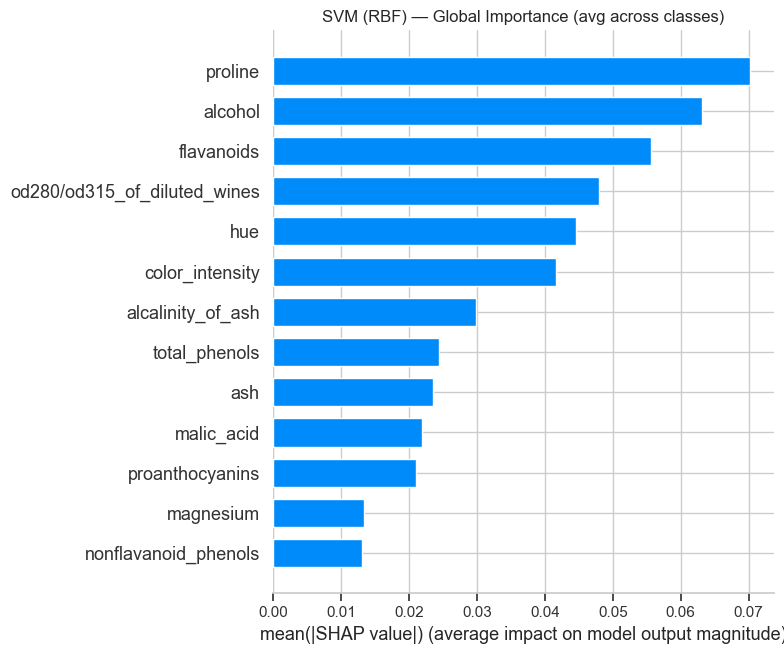

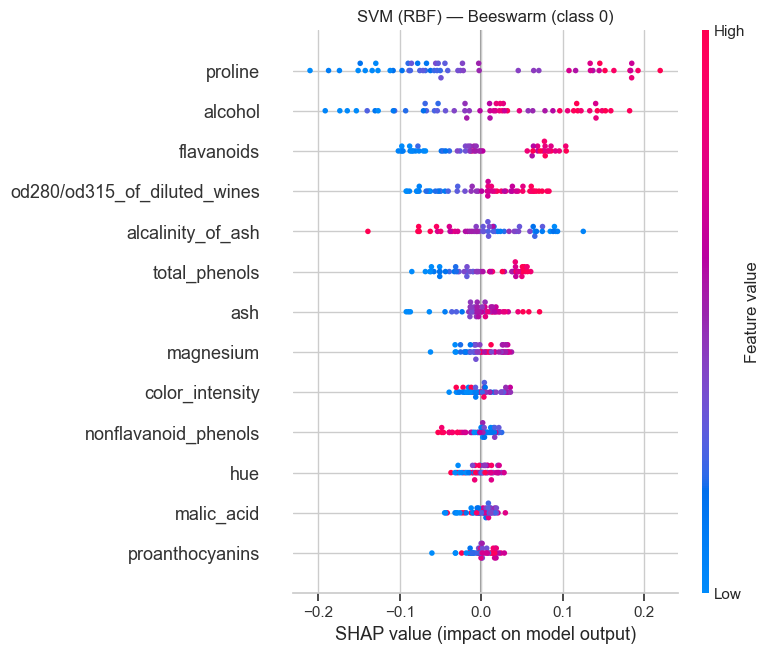

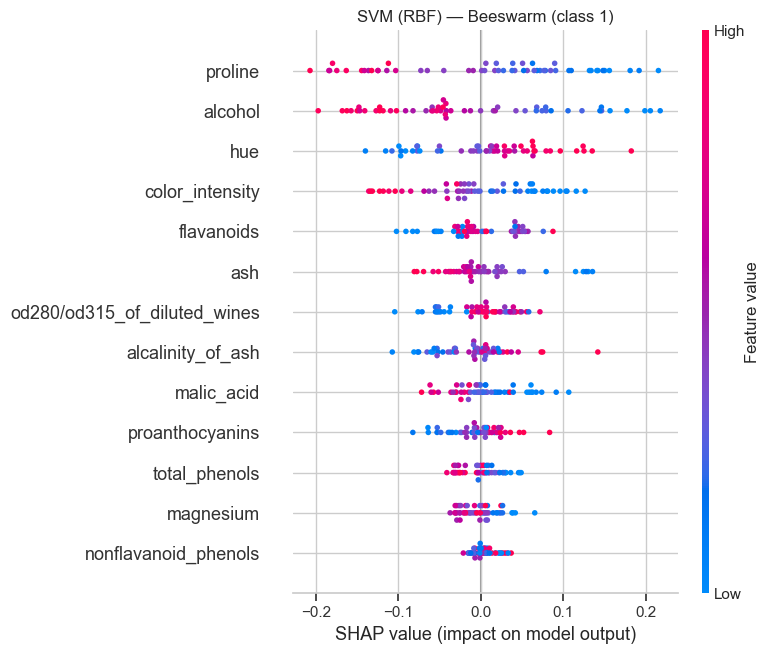

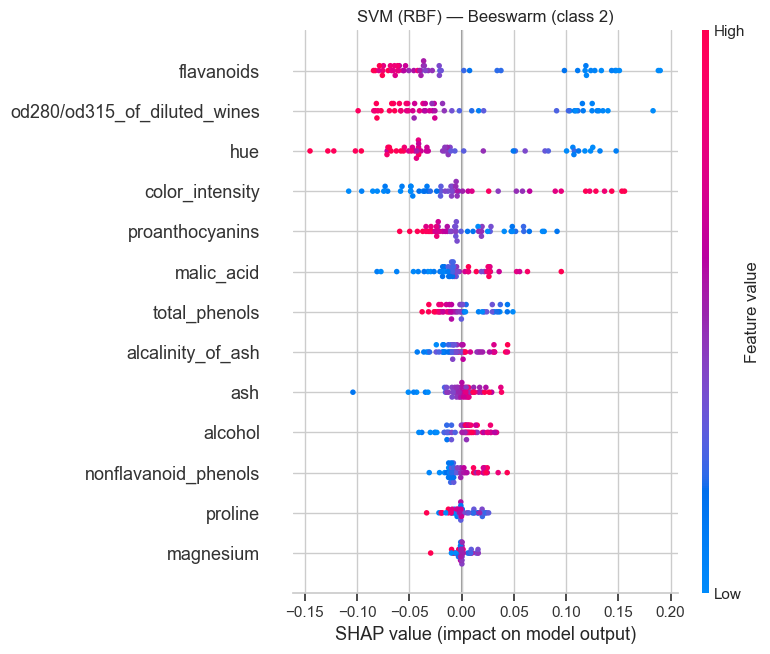


=== SVM (Linear) ===


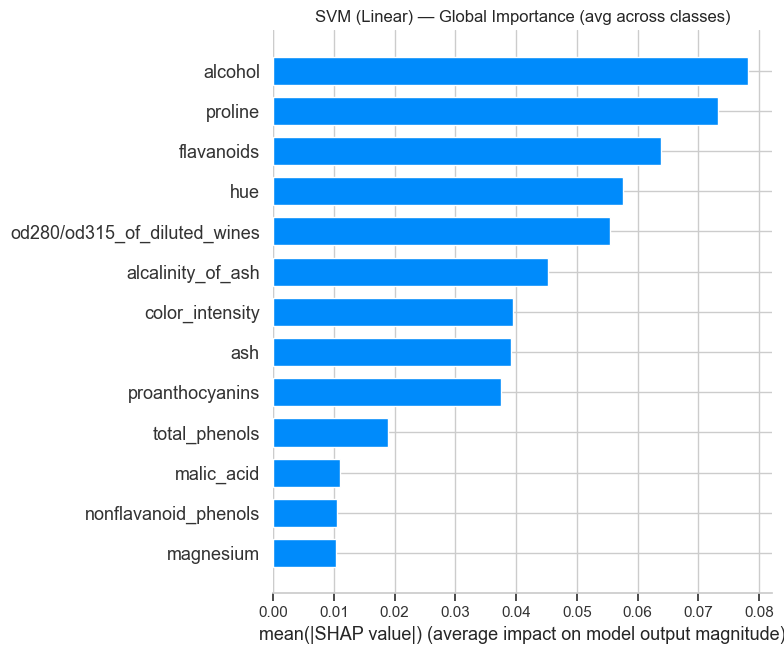

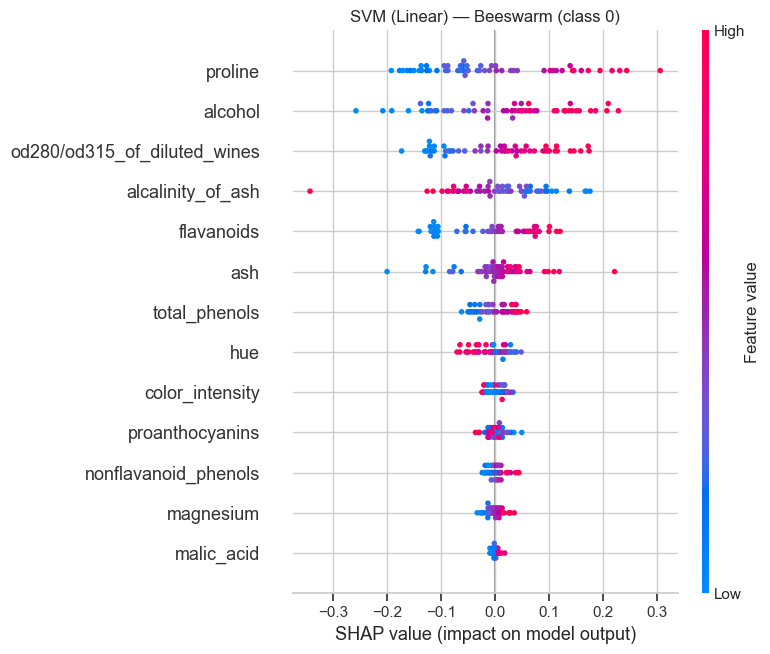

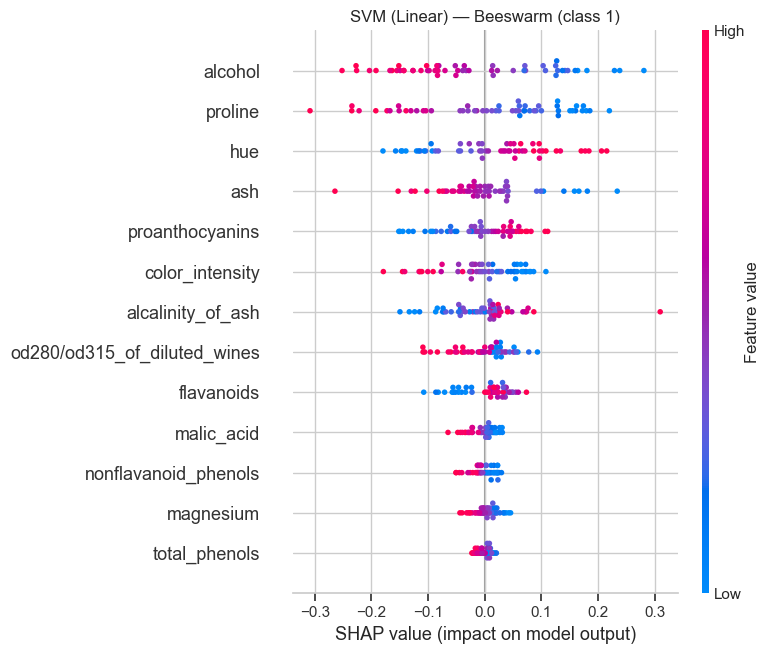

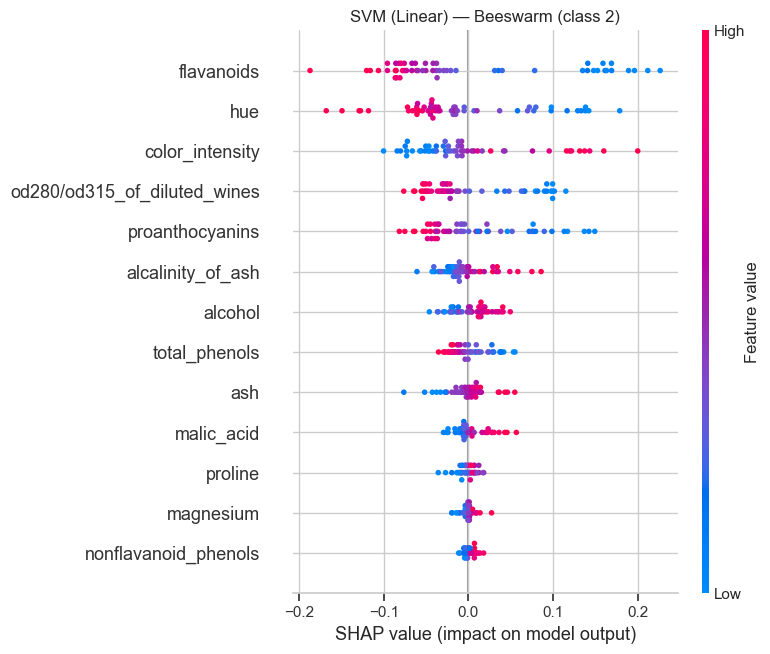

In [46]:
# ==== B) Load and iterate SHAP explanations (robust to array/Explanation/list) ====
import joblib, shap, numpy as np, matplotlib.pyplot as plt
from shap import Explanation

store = joblib.load("shap_results.pkl")

def plot_global_bar(shap_vals, X_explain, title):
    plt.figure()
    shap.summary_plot(shap_vals, X_explain, plot_type="bar", show=False)
    plt.title(title); plt.tight_layout(); plt.show()

def plot_beeswarm(shap_vals, X_explain, title):
    plt.figure()
    shap.summary_plot(shap_vals, X_explain, show=False)
    plt.title(title); plt.tight_layout(); plt.show()

for model_name, pack in store.items():
    shap_vals = pack["shap_values"]
    X_explain = pack["X_explain"]
    class_names = pack["class_names"]

    print(f"\n=== {model_name} ===")

    # Case A: TreeExplainer(raw) -> list of arrays [n_classes, n_samples, n_features]
    if isinstance(shap_vals, list):
        merged = np.mean([np.abs(v) for v in shap_vals], axis=0)  # average |impact| across classes
        plot_global_bar(merged, X_explain, f"{model_name} — Global Importance (avg across classes)")
        for c, arr in enumerate(shap_vals):
            plot_beeswarm(arr, X_explain, f"{model_name} — Beeswarm (class {class_names[c]})")
        continue

    # Case B/C: Explanation object OR plain ndarray
    # Normalize to get a NumPy array `vals` with shape:
    #  - (n_samples, n_features, n_classes)  OR
    #  - (n_samples, n_features)
    if isinstance(shap_vals, Explanation):
        vals = shap_vals.values
    else:
        vals = np.asarray(shap_vals)  # handle ndarray return

    # Multiclass (3D) vs binary-style (2D)
    if vals.ndim == 3:
        # Global: mean |SHAP| over classes
        merged = np.mean(np.abs(vals), axis=2)  # (n_samples, n_features)
        plot_global_bar(merged, X_explain, f"{model_name} — Global Importance (avg across classes)")
        # Per-class beeswarm
        for c in range(vals.shape[2]):
            plot_beeswarm(vals[:, :, c], X_explain, f"{model_name} — Beeswarm (class {class_names[c]})")
    elif vals.ndim == 2:
        plot_global_bar(vals, X_explain, f"{model_name} — Global Importance")
        plot_beeswarm(vals, X_explain, f"{model_name} — Beeswarm")
    else:
        print(f"[WARN] Unexpected SHAP values shape: {vals.shape}")


# SHAP Feature Importance — Model Family Analysis
## 1. Tree based Model: Decision Tree (CART), Random Forest, Gradient Boosting  
**Frequent top features:** are colour intensity, flavanoids and proline
**Why similar:**  
Tree algorithms naturally split on features that create the **sharpest partitions** in data.  
In this dataset, `color_intensity` and `flavanoids` create clear class boundaries, so all three models elevate them.
Tree-based algorithms (Decision Tree, Random Forest, Gradient Boosting) make decisions by repeatedly splitting the dataset into smaller, more homogeneous groups.
At each split, the algorithm searches for the feature and threshold that best separates the data into distinct classes — in other words, the split that produces the sharpest partition

## 2. Probabilistic Model
**Includes:** Gaussian Naive Bayes  
Gaussian Naive Bayes is a probabilistic classifier that makes predictions using Bayes’ theorem under the simplifying assumption that all features are independent given the class.

**Frequent top features:**
- `flavanoids`, `color_intensity`, `proline`, `alcohol`, `od280/od315_of_diluted_wines`  
Even though its a probabilistic classifier assuming independence between predictors, it still classifies, flavanoids and colour_intensity and proline as top 3 predictors of classifying the wine. A completely different type of ML algorithm - hence, we know it's importance in explaining the classification. 

---

## Cross-family Similarities
- **Universal stars:** `proline`, `alcohol`, and `flavanoids` appear in every family’s top features.
- **Chemical vs. color focus:**
  - **Trees** → heavy on **color metrics** (`color_intensity`)
  - **SVMs/k-NN** → more **chemical composition** (`proline`, `alcohol`)
  - **Naive Bayes** → balanced across both
- **Spread of importance:**
  - **Trees** → few features dominate
  - **MLP / Naive Bayes** → broader spread
  - **SVM/k-NN** → mix, but chemical features dominate


random forest - colour intensity, flavanoids, alcohol, proline, dilute wines, hue
gaussian - flavanoids, colour intensity, proline, dilute wines, alochol and hue
the reason these two models work best is the features are the same

In [48]:
# ==== B) Load and iterate SHAP explanations (robust to array/Explanation/list) ====
import os, json, shutil, pathlib, re
import joblib, shap, numpy as np, matplotlib.pyplot as plt
from shap import Explanation

# Optional: try pandas for nicer feature/CSV handling
try:
    import pandas as pd
except Exception:
    pd = None

STORE_PATH = "shap_results.pkl"
OUT_DIR = pathlib.Path("shap_exports")
OUT_DIR.mkdir(exist_ok=True)

def _slug(s):
    s = re.sub(r"\s+", "_", str(s).strip())
    s = re.sub(r"[^A-Za-z0-9_.-]", "", s)
    return s[:120] or "model"

def _feature_names(X):
    # pandas DataFrame with columns
    if pd is not None and hasattr(X, "columns"):
        try:
            return list(X.columns.astype(str))
        except Exception:
            pass
    # NumPy with dtype names
    if hasattr(X, "dtype") and getattr(X.dtype, "names", None):
        return list(X.dtype.names)
    # Fallback
    if hasattr(X, "shape"):
        return [f"f{i}" for i in range(X.shape[1])]
    return []

def _save_X_explain(X, out_base):
    """Save X_explain as CSV (if DataFrame) else as .npy"""
    if pd is not None and isinstance(X, pd.DataFrame):
        X.to_csv(out_base.with_suffix(".csv"), index=False)
    else:
        np.save(out_base.with_suffix(".npy"), np.asarray(X))

def _save_raw_shap(model_dir, arr, base_values=None):
    """Save raw SHAP arrays and base values in compressed NPZ"""
    out = model_dir / "raw_shap_values.npz"
    if base_values is not None:
        np.savez_compressed(out, shap_values=np.asarray(arr), base_values=np.asarray(base_values))
    else:
        np.savez_compressed(out, shap_values=np.asarray(arr))

def _save_feature_importance_csv(model_dir, feature_names, per_sample_vals, filename="mean_abs_shap_by_feature.csv"):
    """
    per_sample_vals: array (n_samples, n_features) of SHAP values (any sign).
    Saves mean(|SHAP|) by feature.
    """
    mags = np.mean(np.abs(per_sample_vals), axis=0)  # shape (n_features,)
    if pd is not None:
        df = pd.DataFrame({"feature": feature_names, "mean_abs_shap": mags})
        df.sort_values("mean_abs_shap", ascending=False, inplace=True)
        df.to_csv(model_dir / filename, index=False)
    else:
        # Plain CSV writing
        order = np.argsort(-mags)
        with open(model_dir / filename, "w", encoding="utf-8") as f:
            f.write("feature,mean_abs_shap\n")
            for i in order:
                f.write(f"{feature_names[i]},{mags[i]}\n")

def _savefig(path):
    plt.tight_layout()
    plt.savefig(path, dpi=200, bbox_inches="tight")
    plt.close()

def plot_global_bar(shap_vals, X_explain, title, save_path):
    plt.figure()
    shap.summary_plot(shap_vals, X_explain, plot_type="bar", show=False)
    plt.title(title)
    _savefig(save_path)

def plot_beeswarm(shap_vals, X_explain, title, save_path):
    plt.figure()
    shap.summary_plot(shap_vals, X_explain, show=False)
    plt.title(title)
    _savefig(save_path)

store = joblib.load(STORE_PATH)

manifest = []

for model_name, pack in store.items():
    shap_vals = pack["shap_values"]
    X_explain = pack["X_explain"]
    class_names = pack.get("class_names", [])
    feat_names = _feature_names(X_explain)

    safe_name = _slug(model_name)
    model_dir = OUT_DIR / safe_name
    model_dir.mkdir(exist_ok=True)

    # Save X_explain
    _save_X_explain(X_explain, model_dir / "X_explain")

    print(f"\n=== {model_name} ===")

    # Case A: TreeExplainer(raw) -> list of arrays [n_classes, n_samples, n_features]
    if isinstance(shap_vals, list):
        values_list = [np.asarray(v) for v in shap_vals]
        # Save raw per-class arrays
        for idx, arr in enumerate(values_list):
            np.save(model_dir / f"shap_values_class{idx}.npy", arr)
        # Also save combined NPZ
        _save_raw_shap(model_dir, np.stack(values_list, axis=0))

        # Global importances (average |impact| across classes -> (n_samples, n_features))
        merged = np.mean([np.abs(v) for v in values_list], axis=0)
        # Save per-feature mean |SHAP|
        _save_feature_importance_csv(model_dir, feat_names, merged)

        # Plots
        plot_global_bar(
            merged, X_explain,
            f"{model_name} — Global Importance (avg across classes)",
            model_dir / "global_importance_avg_across_classes.png"
        )
        for c, arr in enumerate(values_list):
            cname = class_names[c] if c < len(class_names) else f"class_{c}"
            plot_beeswarm(
                arr, X_explain,
                f"{model_name} — Beeswarm (class {cname})",
                model_dir / f"beeswarm_class_{_slug(cname)}.png"
            )

        manifest.append({
            "model": model_name,
            "type": "list_raw_treeexplainer",
            "files": sorted([str(p.name) for p in model_dir.iterdir()])
        })
        continue

    # Case B/C: Explanation object OR plain ndarray
    # Normalize to get a NumPy array `vals`:
    if isinstance(shap_vals, Explanation):
        vals = shap_vals.values
        base_vals = getattr(shap_vals, "base_values", None)
    else:
        vals = np.asarray(shap_vals)
        base_vals = None

    # Save raw arrays
    _save_raw_shap(model_dir, vals, base_values=base_vals)

    # Multiclass (3D) vs binary-style (2D)
    if vals.ndim == 3:
        # merged: (n_samples, n_features)
        merged = np.mean(np.abs(vals), axis=2)
        _save_feature_importance_csv(model_dir, feat_names, merged)

        plot_global_bar(
            merged, X_explain,
            f"{model_name} — Global Importance (avg across classes)",
            model_dir / "global_importance_avg_across_classes.png"
        )

        # Per-class beeswarm
        for c in range(vals.shape[2]):
            cname = class_names[c] if c < len(class_names) else f"class_{c}"
            plot_beeswarm(
                vals[:, :, c], X_explain,
                f"{model_name} — Beeswarm (class {cname})",
                model_dir / f"beeswarm_class_{_slug(cname)}.png"
            )

        manifest.append({
            "model": model_name,
            "type": "multiclass_3d",
            "files": sorted([str(p.name) for p in model_dir.iterdir()])
        })

    elif vals.ndim == 2:
        _save_feature_importance_csv(model_dir, feat_names, vals)

        plot_global_bar(
            vals, X_explain,
            f"{model_name} — Global Importance",
            model_dir / "global_importance.png"
        )
        plot_beeswarm(
            vals, X_explain,
            f"{model_name} — Beeswarm",
            model_dir / "beeswarm.png"
        )

        manifest.append({
            "model": model_name,
            "type": "binary_or_regression_2d",
            "files": sorted([str(p.name) for p in model_dir.iterdir()])
        })
    else:
        print(f"[WARN] Unexpected SHAP values shape: {vals.shape}")
        manifest.append({
            "model": model_name,
            "type": f"unexpected_shape_{list(vals.shape)}",
            "files": sorted([str(p.name) for p in model_dir.iterdir()])
        })

# Save manifest + metadata
meta = {
    "source_store": STORE_PATH,
    "models": manifest,
}
with open(OUT_DIR / "manifest.json", "w", encoding="utf-8") as f:
    json.dump(meta, f, indent=2)

# Zip the whole export directory so you can upload one file
zip_path = shutil.make_archive("shap_exports", "zip", root_dir=str(OUT_DIR))
print(f"\nAll done. Created archive: {zip_path}")



=== Decision Tree (CART) ===

=== Random Forest ===

=== Gradient Boosting ===

=== Gaussian Naive Bayes ===

=== k-Nearest Neighbors ===

=== Neural Net (MLP) ===

=== SVM (RBF) ===

=== SVM (Linear) ===

All done. Created archive: C:\Users\neetm\Desktop\unrelated\shap_exports.zip
